In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/CO2_Emissions_Canada.csv')
df.head(7)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232


# Preprocessing steps:

In [3]:
df.info() # information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

#### Checking for number of unique values:

In [4]:
df.nunique() # no of unquie values in each column

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [5]:
print('Unique values in Cylinders column: ',df['Cylinders'].dropna().unique())
print('Unique values in Fuel Type column: ',df['Fuel Type'].dropna().unique())

Unique values in Cylinders column:  [ 4  6 12  8 10  3  5 16]
Unique values in Fuel Type column:  ['Z' 'D' 'X' 'E' 'N']


#### Checking for null values:

In [6]:
# checking for null values -> isna() or isnull()
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#### Checking for duplicate rows:

In [7]:
df.duplicated().sum() # check for any duplicate rows are present/not

1103

In [8]:
df.shape[0] # -> no of rows in the data set

7385

#### Drop Duplicate rows:

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# Again checking for duplicate rows
df.duplicated().sum()

0

#### Checking for weird characters:

In [11]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [12]:
# Make, Model, Vehicle Class, Transmission, Fuel Type
print('Unique values in "Make" column         : ',df['Make'].dropna().unique())
print('Unique values in "Model" column        : ',df['Model'].dropna().unique())
print('Unique values in "Vehicle Class" column: ',df['Vehicle Class'].dropna().unique())
print('Unique values in "Transmission" column : ',df['Transmission'].dropna().unique())
print('Unique values in "Fuel Type" column    : ',df['Fuel Type'].dropna().unique())

Unique values in "Make" column         :  ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
Unique values in "Model" column        :  ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
Unique values in "Vehicle Class" column:  ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Unique values in "Transmission" column :  ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6

#### No weird characters are present in the data set.

# Exploratory data analysis:
- The objective of EDA wrt Machine Learning Project is limited.
- Your data set may have many features(columns), but we don't require to study all the features.
- We only study the features(independent) those effecting the Target feature(dependent).
- We only study (?,Dependent feature), Dependent feature is fixed.

# Q. How engine size is effecting the carbon emission?

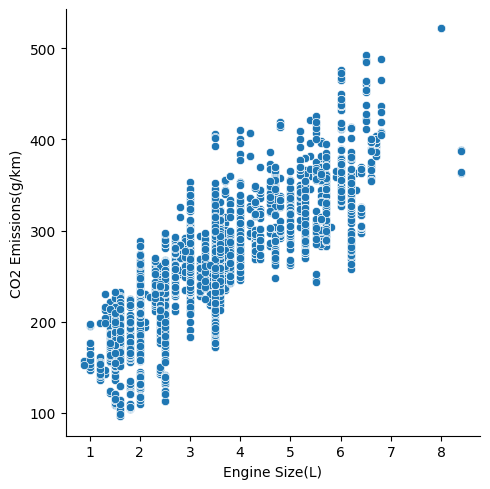

In [13]:
# Line plot and scatter plot
sns.relplot(data=df,x='Engine Size(L)',y='CO2 Emissions(g/km)',kind='scatter')

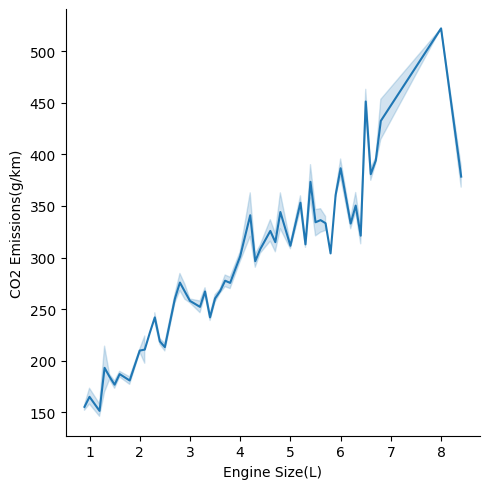

In [14]:
sns.relplot(data=df,x='Engine Size(L)',y='CO2 Emissions(g/km)',kind='line')

### As the engine size increases then the carbon emission also increases.

# Q. How number of cylinders are effecting carbon emission?

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

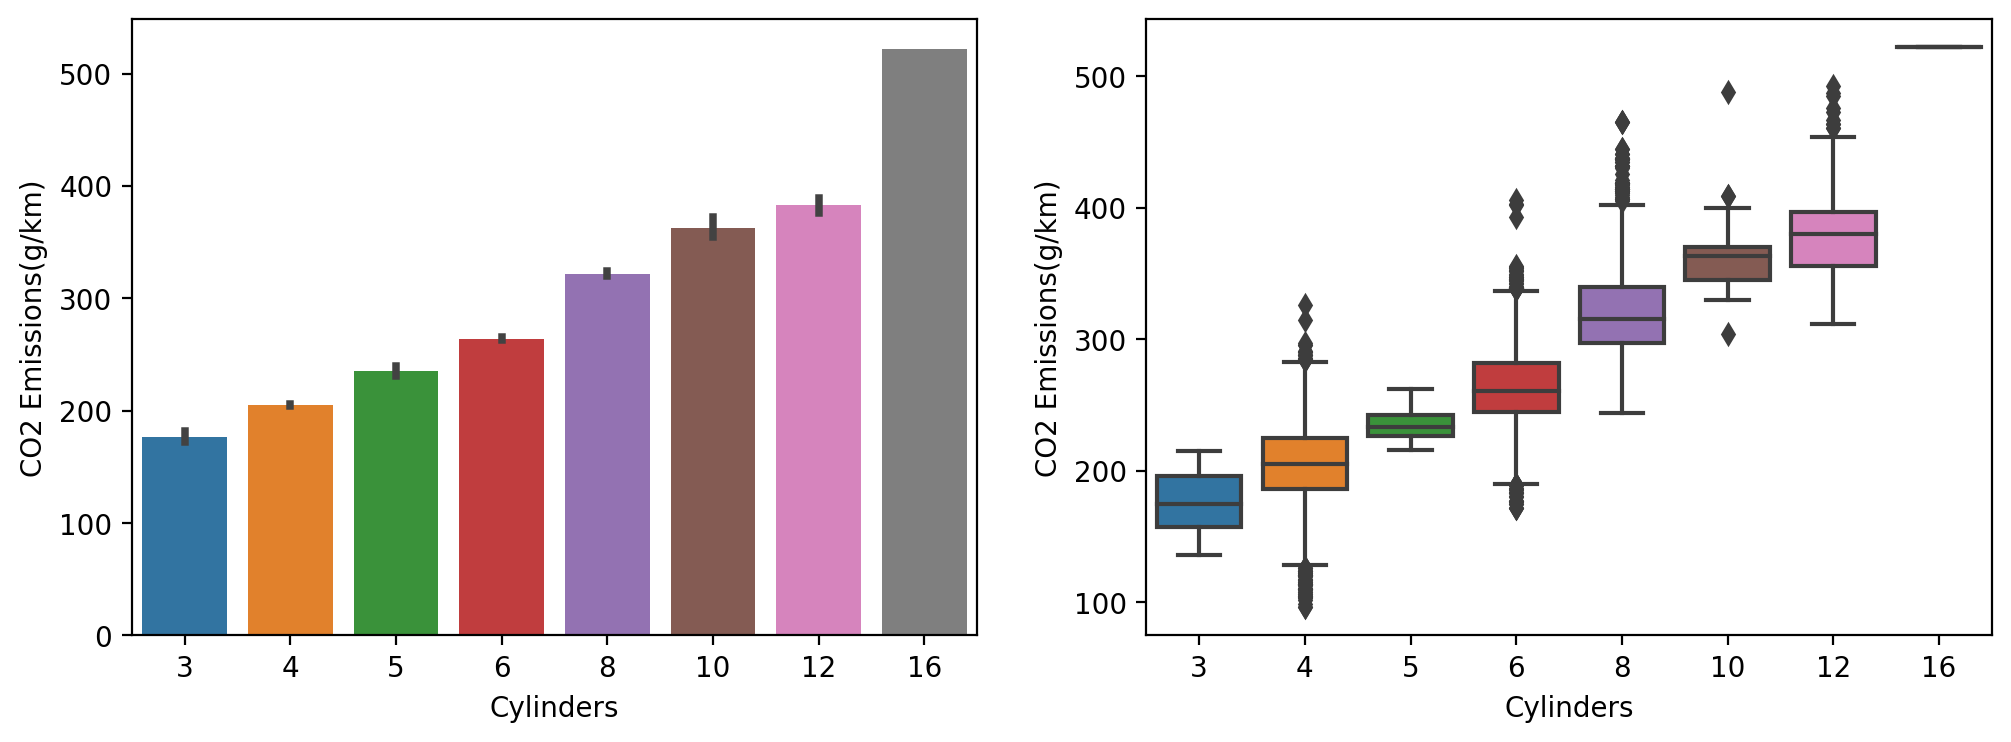

In [15]:
# Cylinders -> Categorical, CO2 Emissions(g/km) -> Numerical
# Bar plot / Box plot
plt.figure(figsize=(12,4),dpi=200)
plt.subplot(1,2,1)
sns.barplot(x='Cylinders',y='CO2 Emissions(g/km)',data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Cylinders',y='CO2 Emissions(g/km)',data=df)

### As the number of cylinders increases then the average carbon emission also increases.

# Q. How fuel type is effecting the carbon emission?

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

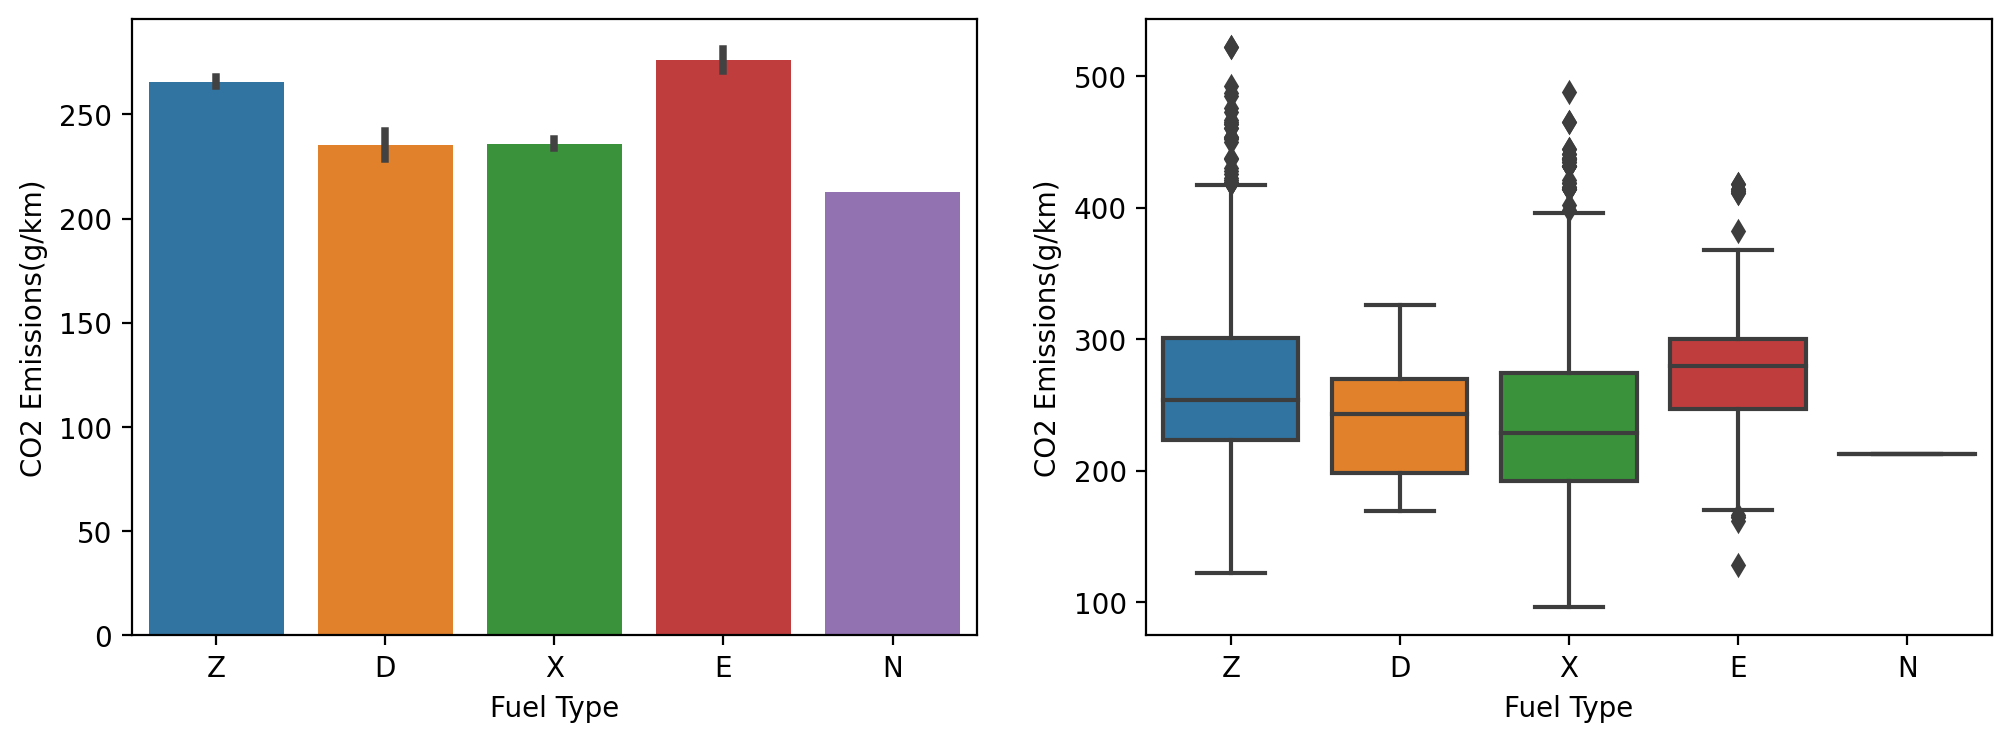

In [16]:
# Bar plot / Box plot
plt.figure(figsize=(12,4),dpi=200)
plt.subplot(1,2,1)
sns.barplot(x='Fuel Type',y='CO2 Emissions(g/km)',data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Fuel Type',y='CO2 Emissions(g/km)',data=df)

In [17]:
df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

Fuel Type
E    276.048485
Z    265.731284
X    235.977953
D    235.238095
N    213.000000
Name: CO2 Emissions(g/km), dtype: float64

### Average carbon emission of E and Z fuel types are bit higher.

# Q. How fuel consumption is effecting the carbon emission?

<Figure size 2400x800 with 0 Axes>

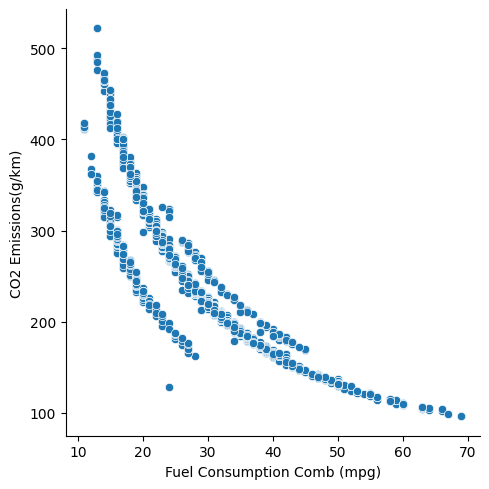

In [18]:
# 2 col's are cont.. numerical columns -> Use line plot and scatter plot
plt.figure(figsize=(12,4),dpi=200)
sns.relplot(data=df,x='Fuel Consumption Comb (mpg)',y='CO2 Emissions(g/km)',kind='scatter')

### Higher the fuel consumption then higher the carbon emission(understand the unit-->miles/gallon).

# Q. How Vehicle Class is effecting carbon emission?

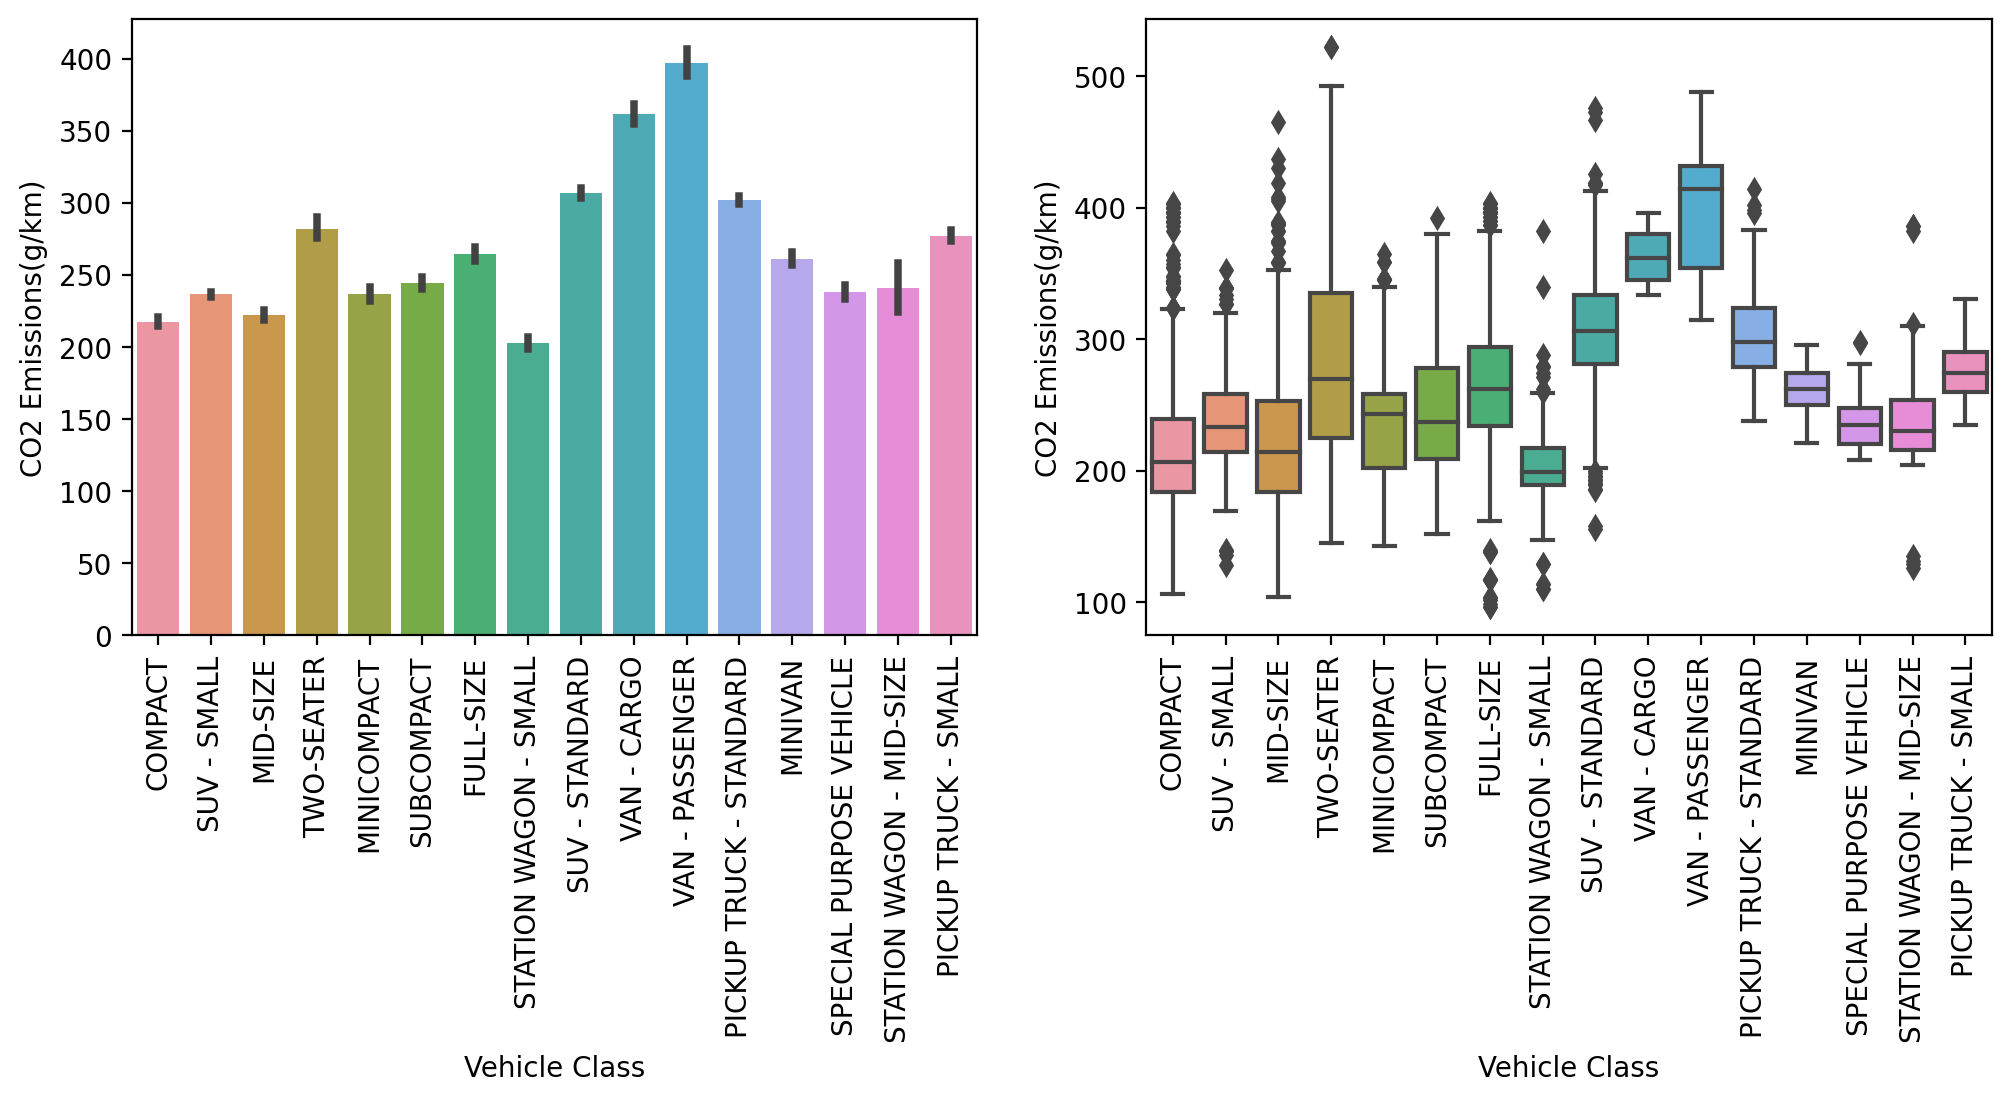

In [19]:
# Bar plot / Box plot
plt.figure(figsize=(12,4),dpi=200)
plt.subplot(1,2,1)
sns.barplot(x='Vehicle Class',y='CO2 Emissions(g/km)',data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x='Vehicle Class',y='CO2 Emissions(g/km)',data=df)
plt.xticks(rotation=90)
plt.show()

### Vehicle with larger in size then more the carbon emission.

# Q. How Transmission effecting the carbon emission?

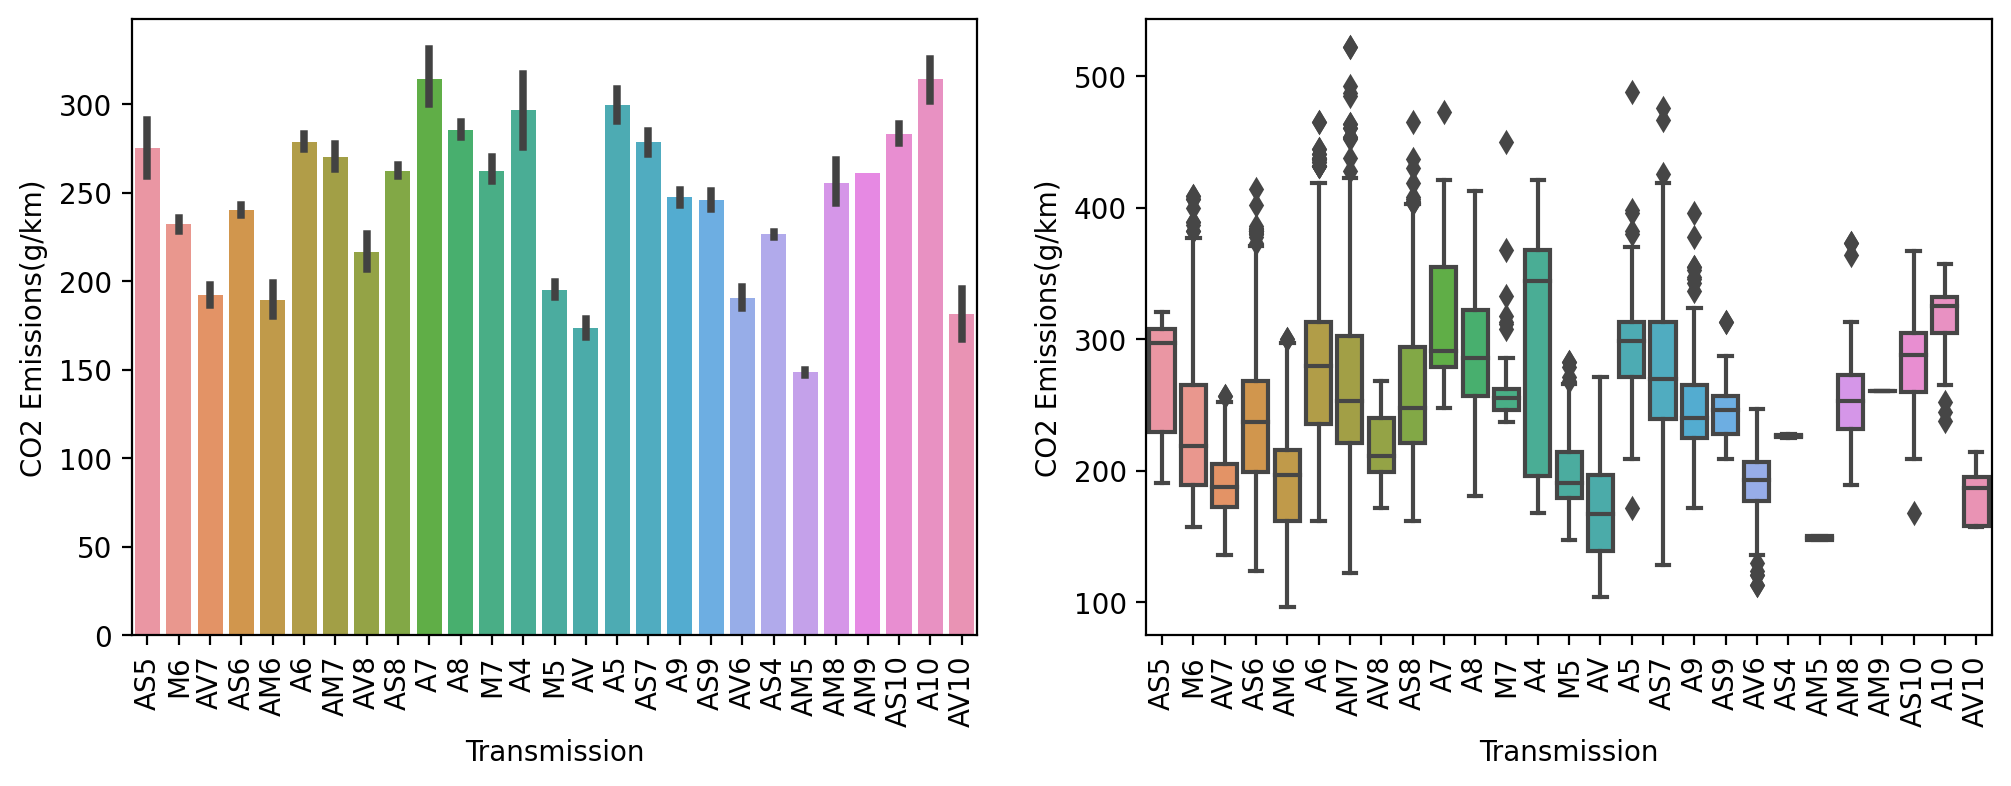

In [20]:
# Bar plot / Box plot
plt.figure(figsize=(12,4),dpi=200)
plt.subplot(1,2,1)
sns.barplot(x='Transmission',y='CO2 Emissions(g/km)',data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x='Transmission',y='CO2 Emissions(g/km)',data=df)
plt.xticks(rotation=90)
plt.show()

In [21]:
df.drop('Cylinders',axis=1).corr() # correlation

<ipython-input-21-c12efcdbba07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('Cylinders',axis=1).corr() # correlation


,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.834228,0.766817,0.820146,-0.762955,0.854802
Fuel Consumption City (L/100 km),0.834228,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.918756,0.883424,0.916840,-0.906783,1.000000


<ipython-input-22-6d7a8839451c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('Cylinders',axis=1).corr(),annot=True)


<Axes: >

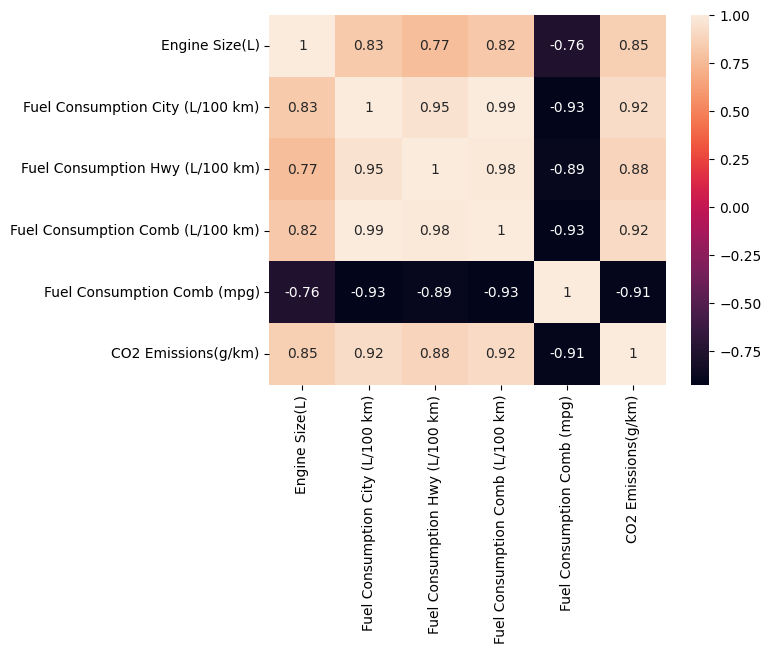

In [22]:
# heatmap
sns.heatmap(df.drop('Cylinders',axis=1).corr(),annot=True)